# Recognising HandWritten Digits on MNIST Dataset using KNN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Preparation

In [2]:
ds = pd.read_csv('train.csv')
print(ds.shape)

(59999, 785)


In [3]:
ds.head(n=5)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = ds.values
print(data.shape)
print(type(data))

(59999, 785)
<class 'numpy.ndarray'>


In [5]:
X = data[:,1:]
Y = data[:, 0]
print(X.shape,Y.shape)

(59999, 784) (59999,)


# Splitting The Data

In [6]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

47999
(47999, 784) (47999,)
(12000, 784) (12000,)


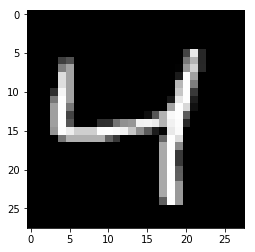

4


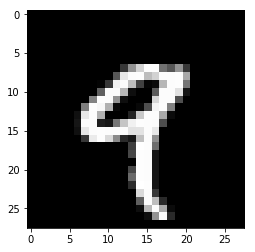

9


In [7]:
#Visualise Some Samples

def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImage(X_train[1])
print(Y_train[1])

drawImage(X_train[3])
print(Y_train[3])

# Step 2. K-NN 

In [8]:

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    for i in range(m):
        
        d = dist(queryPoint, X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    #Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

# Step 3. Make Predictions

In [9]:
pred = knn(X_train,Y_train,X_test[0])

print(int(pred))

4


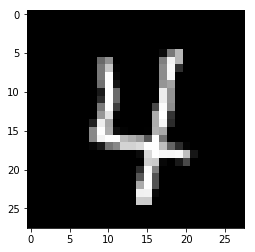

4


In [10]:
drawImage(X_test[0])
print(Y_test[0])


In [11]:
def predict(X_train,Y_train,X_test):
    
    all_pred = []
    
    for x in X_test:
        pred = knn(X_train,Y_train,x)
        all_pred.append(pred)
        
    all_pred = np.array(all_pred,dtype='int32')
    #print(all_pred)
    return all_pred

In [ ]:
pred = predict(X_train,Y_train,X_test)
accuracy = np.sum(Y_test == pred)/Y_test.shape[0]
print(accuracy)